# Homework 4

## Joining data

### Cleaning data

A quick check of the amonut of NA-values in the datset pop_data.csv shows that for one country, all of the colums contain missing values and for one other country, about half is missing. All of the missing values for the first country is replaced with zeros since there is not any information about the population. For the second country, the missing values is replaced using linear regresission.

In [271]:
cellphones <- read.csv("cellphones_cleaned.csv")
pop_data <- read.csv("pop_data.csv")

na_values <- apply(pop_data, 1, function(row) sum(is.na(row))) 
pop_data[111, ][is.na(pop_data[111, ])] <- 0

replace_na <- function(dataset) {
  for (i in 1:nrow(dataset)) {                      
    row <- as.numeric(dataset[i, ])              
    missing <- which(is.na(row))                     
    if (length(missing) > 0) {                       
        non_zero <- which(row != 0 & !is.na(row))    
        x <- non_zero                               
        y <- row[non_zero]
        model <- lm(y ~ x)                         
        predicted_values <- predict(model, newdata = data.frame(x = missing))  
        predicted_values[predicted_values < 0] <- 0 
        dataset[i, missing] <- round(predicted_values, 0)}} 
    return(dataset)}
pop <- cbind(pop_data[,2], replace_na(pop_data[, -c(1,2)]))

### Combining cellphones and population data

When combining the two datasets, the first step is to change the shape of the dataframe using the pivot_long function. The two datasets are than merged using the merge function by the two common columns iso3 and year. Finally the years part is made numeric and the X infront is removed.

In [282]:
library("tidyverse")
library("knitr")
library("kableExtra")

names(cellphones)[1] <- "iso3"
names(pop)[1] <- "iso3"

cellphones_long <- cellphones %>%
  pivot_longer(cols = -iso3, names_to = "year", values_to = "cellphones")

pop_long <- pop %>%
  pivot_longer(cols = -iso3, names_to = "year", values_to = "population")

cell_pop <- merge(cellphones_long, pop_long, by = c("iso3", "year"))
cell_pop$year <- as.numeric(gsub("X", "", cell_pop$year))
cell_pop <- cell_pop[order(cell_pop$year), ]; rownames(cell_pop) <- NULL

<table class="table" style="width: auto !important; ">
<caption>Table 1</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> iso-3 </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Year </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> # Cellphones </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Population </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> ABW </td>
   <td style="text-align:right;"> 1960 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 54608 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> AFG </td>
   <td style="text-align:right;"> 1960 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 8622466 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> AGO </td>
   <td style="text-align:right;"> 1960 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 5357195 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ALB </td>
   <td style="text-align:right;"> 1960 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1608800 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> AND </td>
   <td style="text-align:right;"> 1960 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 9443 </td>
  </tr>
</tbody>
</table>


### Combining cellphones/population with country data 

The two relevant columns in the country data is merged with the previous dataset with the merge function by their common column iso3. To the merged dataset, a new column containging the cellphones per capita is added. The new dataframe is again reshaped with countrys as countries and the rows as years. To sort the columns in the dataframe by row the function based on the values in the 56th colum the function order is combined with the apply function. This is done to order by values in row instead of column.

In [284]:
library("dplyr")
country <- read.csv("country_data.csv")

country_red <- setNames(country[, c(1, 3)], c("Country","iso3"))
merged_data <- merge(cell_pop, country_red, by = "iso3")

merged_data$ppc <- merged_data$cellphones/merged_data$population

ppc_df <- merged_data %>%
  select(year, Country, ppc) %>%
  spread(key = Country, value = ppc)

ppc_df_sorted <- ppc_df[,order(apply(ppc_df, 2, function(col) col[56]), decreasing = TRUE)]

ppc_df_sorted[52:56,1:6] %>%
  kable("html", caption = "Table 2: Cellphones per capita, top five ranked w.r.t 2019.", escape = FALSE, 
        col.names = c("Year", "Turks and Caicos Islands", "Macao", "Hong Kong", "Antigua and Barbuda", "Saint Kitts and Nevis")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 2: Cellphones per capita, top five ranked w.r.t 2019.</caption>
 <thead>
  <tr>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Year </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Turks and Caicos Islands </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Macao </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Hong Kong </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Antigua and Barbuda </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Saint Kitts and Nevis </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 2015 </td>
   <td style="text-align:right;"> 3.124145 </td>
   <td style="text-align:right;"> 3.088231 </td>
   <td style="text-align:right;"> 2.290401 </td>
   <td style="text-align:right;"> 1.956838 </td>
   <td style="text-align:right;"> 1.527516 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2016 </td>
   <td style="text-align:right;"> 3.194452 </td>
   <td style="text-align:right;"> 3.143510 </td>
   <td style="text-align:right;"> 2.398931 </td>
   <td style="text-align:right;"> 1.987545 </td>
   <td style="text-align:right;"> 1.602913 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2017 </td>
   <td style="text-align:right;"> 3.267744 </td>
   <td style="text-align:right;"> 3.210102 </td>
   <td style="text-align:right;"> 2.488774 </td>
   <td style="text-align:right;"> 2.019337 </td>
   <td style="text-align:right;"> 1.609292 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2018 </td>
   <td style="text-align:right;"> 3.331767 </td>
   <td style="text-align:right;"> 3.348741 </td>
   <td style="text-align:right;"> 2.670209 </td>
   <td style="text-align:right;"> 2.197073 </td>
   <td style="text-align:right;"> 2.077385 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2019 </td>
   <td style="text-align:right;"> 3.394847 </td>
   <td style="text-align:right;"> 2.990415 </td>
   <td style="text-align:right;"> 2.863650 </td>
   <td style="text-align:right;"> 2.288590 </td>
   <td style="text-align:right;"> 2.179242 </td>
  </tr>
</tbody>
</table>

### Growth rate plot

The relavant rows and colum from the sorted databased is pivoted into a long dataframe so that it can easily be plotted. It should be noted that the result in the plot shown in figure 1 depend on the estimated values used to fill in the blanc speces in the dataframes. All of the values from the Turks and Caicos Islands are estimates. For all other countries except for Hong Kong, two values are missing. 

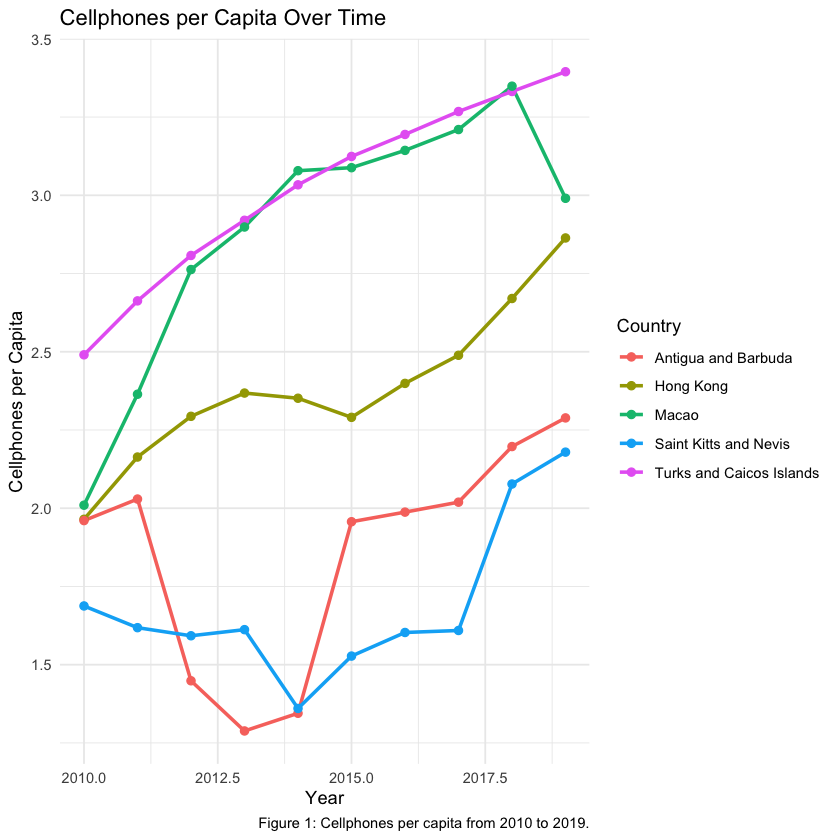

In [244]:
library("ggplot2")

long_data <- pivot_longer(ppc_df_sorted[47:56,1:6] , cols = -year, names_to = "Country", values_to = "Cellphones_pc")

ggplot(long_data, aes(x = year, y = Cellphones_pc, color = Country)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Cellphones per Capita Over Time",
       x = "Year",
       y = "Cellphones per Capita",
       color = "Country",
       caption = "Figure 1: Cellphones per capita from 2010 to 2019.") +
  theme_minimal()

## SQL

The table was initially examined to retrieve the column names.

In [242]:
library("RSQLite")
library("DBI")

con <- dbConnect(RSQLite::SQLite(), "user_actions.db")
usernames <- dbGetQuery(con, "SELECT DISTINCT username FROM user_actions WHERE action = 'signup'")
log_entries <- dbGetQuery(con, "SELECT user_id, username, COUNT(*) AS log_count FROM user_actions 
                               GROUP BY user_id")
login_signup_same_day <- dbGetQuery(con, "SELECT user_id, username FROM user_actions WHERE action 
                                       IN ('login', 'signup') GROUP BY user_id, username, 
                                       DATE(timestamp) HAVING COUNT(DISTINCT action) = 2")
print(log_entries)
print(login_signup_same_day)

   user_id username log_count
1        1    user1       104
2        2    user2       149
3        3    user3       108
4        4    user4       436
5        5    user5       192
6        6    user6       457
7        7    user7       362
8        8    user8       329
9        9    user9       118
10      10   user10       170
11      11   user11       328
12      12   user12       209
13      13   user13       470
14      14   user14       320
15      15   user15        35
16      16   user16       379
17      17   user17       367
18      18   user18       122
19      19   user19        58
20      20   user20       362
21      21   user21       323
22      22   user22       275
23      23   user23       309
24      24   user24       162
25      25   user25       136
26      26   user26       217
27      27   user27       211
28      28   user28        91
29      29   user29        49
30      30   user30       165
31      31   user31       389
32      32   user32        32
33      33

## Regex

To find all hashtags, all of the occurences of hastags followd by one or more alphanumeric characters or underscores are extracted using the str_extract_all function. To find comments that contain both the hashtags '#programming' and '#python' the grepl is used with a regular expression pattern to match comments containing both hashtags. The perl = TRUE argument allows for more advanced regex features.

In [288]:
comments <- readLines("comments.txt")
hashtags <- str_extract_all(comments, "#[A-Za-z0-9_]+")
hashtags
prog_pyth <- comments[grepl("(?=.*#programming)(?=.*#python)", comments, perl = TRUE)]
prog_pyth 
unique_hashtags <- unique(unlist(hashtags))
unique_hashtags

[[1]]
[1] "#programming" "#tips"       

[[2]]
[1] "#coding" "#python"

[[3]]
[1] "#tech" "#data"

[[4]]
[1] "#programming" "#coding"     

[[5]]
[1] "#data"     "#analysis"

[[6]]
[1] "#programming" "#python"      "#tips"       

[[7]]
[1] "#tech"       "#innovation"

[[8]]
[1] "#coding" "#python"

[[9]]
[1] "#data"      "#analytics"

[[10]]
[1] "#programming" "#tips"       

[[11]]
[1] "#coding" "#python"

[[12]]
[1] "#tech" "#data"

[[13]]
[1] "#programming" "#coding"     

[[14]]
[1] "#data"     "#insights"

[[15]]
[1] "#programming" "#python"      "#tips"       

[[16]]
[1] "#tech"     "#research"

[[17]]
[1] "#coding" "#python"

[[18]]
[1] "#data"      "#analytics"

[[19]]
[1] "#programming" "#tips"       

[[20]]
[1] "#coding"     "#innovation"

[[21]]
[1] "#programming" "#python"      "#tips"       

[[22]]
[1] "#tech" "#data"

[[23]]
[1] "#coding" "#python"

[[24]]
[1] "#data"      "#analytics"

[[25]]
[1] "#programming" "#tips"       

[[26]]
[1] "#coding" "#python"

[[27]]
[1] "#tech"       "#innovation"

[[28]]
[1] "#programming" "#coding"     

[[29]]
[1] "#data"      "#analytics"

[[30]]
[1] "#programming" "#python"      "#tips"       

[[31]]
[1] "#coding"     "#innovation"

[[32]]
[1] "#tech" "#data"

[[33]]
[1] "#programming" "#tips"       

[[34]]
[1] "#coding" "#python"

[[35]]
[1] "#data"     "#analysis"

[[36]]
[1] "#programming" "#tips"       

[[37]]
[1] "#coding" "#python"

[[38]]
[1] "#tech"       "#innovation"

[[39]]
[1] "#programming" "#coding"     

[[40]]
[1] "#data"      "#analytics"

[[41]]
[1] "#programming" "#tips"       

[[42]]
[1] "#coding" "#python"

[[43]]
[1] "#data"     "#analysis"

[[44]]
[1] "#programming" "#tips"       

[[45]]
[1] "#coding" "#python"

[[46]]
[1] "#tech"       "#innovation"

[[47]]
[1] "#programming" "#coding"     

[[48]]
[1] "#data"      "#analytics"

[[49]]
[1] "#programming" "#tips"       

[[50]]
[1] "#coding" "#python"

[[51]]
[1] "#tech"       "#innovation"

[[52]]
[1] "#programming" "#coding"     

[[53]]
[1] "#data"      "#analytics"

[[54]]
[1] "#programming" "#tips"       

[[55]]
[1] "#coding" "#python"

[[56]]
[1] "#tech"       "#innovation"

[[57]]
[1] "#programming" "#coding"     

[[58]]
[1] "#data"      "#analytics"

[[59]]
[1] "#programming" "#tips"       

[[60]]
[1] "#coding" "#python"

[[61]]
[1] "#tech"       "#innovation"

[[62]]
[1] "#programming" "#coding"     

[[63]]
[1] "#data"      "#analytics"

[[64]]
[1] "#programming" "#tips"       

[[65]]
[1] "#coding" "#python"

[[66]]
[1] "#tech"       "#innovation"

[[67]]
[1] "#programming" "#coding"     

[[68]]
[1] "#data"      "#analytics"

[[69]]
[1] "#programming" "#tips"       

[[70]]
[1] "#coding" "#python"

[[71]]
[1] "#tech"       "#innovation"

[[72]]
[1] "#programming" "#coding"     

[[73]]
[1] "#data"      "#analytics"

[[74]]
[1] "#programming" "#tips"       

[[75]]
[1] "#coding" "#python"

[[76]]
[1] "#tech"       "#innovation"

[[77]]
[1] "#programming" "#coding"     

[[78]]
[1] "#data"      "#analytics"

[[79]]
[1] "#programming" "#tips"       

[[80]]
[1] "#coding" "#python"

[[81]]
[1] "#tech"       "#innovation"

[[82]]
[1] "#programming" "#coding"     

[[83]]
[1] "#data"      "#analytics"

[[84]]
[1] "#programming" "#tips"       

[[85]]
[1] "#coding" "#python"

[[86]]
[1] "#tech"       "#innovation"

[[87]]
[1] "#programming" "#coding"     

[[88]]
[1] "#data"      "#analytics"

[[89]]
[1] "#programming" "#tips"       

[[90]]
[1] "#coding" "#python"

[[91]]
[1] "#tech"       "#innovation"

[[92]]
[1] "#programming" "#coding"     

[[93]]
[1] "#data"      "#analytics"

[[94]]
[1] "#programming" "#tips"       

[[95]]
[1] "#coding" "#python"

[[96]]
[1] "#tech"       "#innovation"

[[97]]
[1] "#programming" "#coding"     

[[98]]
[1] "#data"      "#analytics"

[[99]]
[1] "#programming" "#tips"       

[[100]]
[1] "#coding" "#python"

[1] "6. \"I learned a lot. #programming #python #tips\""      
[2] "15. \"Well explained. #programming #python #tips\""      
[3] "21. \"Love the content! #programming #python #tips\""    
[4] "30. \"Inspired by the tips. #programming #python #tips\""

[1] "#programming" "#tips"        "#coding"      "#python"      "#tech"       
 [6] "#data"        "#analysis"    "#innovation"  "#analytics"   "#insights"   
[11] "#research"